* Kernel Density Estimation (KDE) is a method for estimating the Probability Density Fucntion using a set of fininte samples
* It is close to the concept of histogram, but it converges better to the true density of the data and generates smooth curve vs discrete histogram
* KDE gets use of a kernel function and a bandwidth parameter to estimate the density at each point according to the following equation:
* $\hat{f}_h(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)$
* The value of the kernel at each point is added up to produce the final PDF curve
* Parameter h is called the bandwith and controls the smoothness of the final calculated curve

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

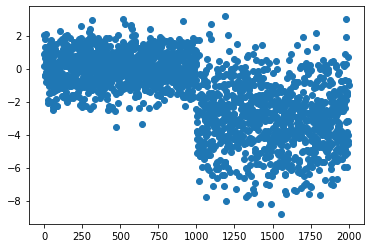

In [12]:
# generating and plotting random data

mu, sigma = 0, 1
mu2, sigma2 = -3, 2
n=1000
x1 = np.random.normal(mu, sigma, n)
x2 = np.random.normal(mu2, sigma2, n)
random_data = np.concatenate([x1, x2])
#random_data = X.reshape(-1, 1)

plt.scatter(np.arange(len(random_data)),random_data)

<BarContainer object of 100 artists>

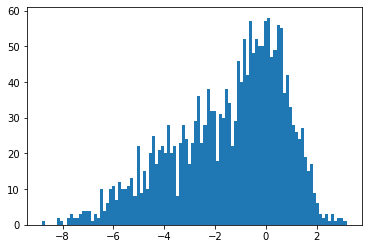

In [13]:
counts, bins, patches = plt.hist(random_data, bins=100)
patches

In [14]:
x_d = np.linspace(-5, 5, 1000).reshape(-1, 1)
h = 0.5

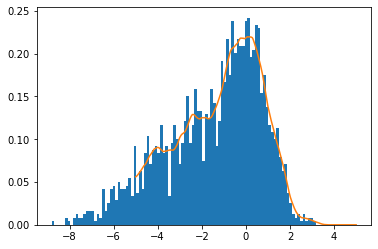

In [18]:
output =  KernelDensity(kernel='epanechnikov', bandwidth=h).fit(random_data.reshape(-1, 1))
density = np.exp(output.score_samples(x_d))
plt.hist(random_data, bins=100, density=True)
plt.plot(x_d,density)

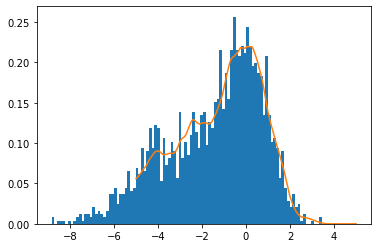

In [20]:
#  custom implementation
def Epanechnikov(x):
    return (3/4)*(1-x**2)*(np.abs(x) <= 1) 

def kernel_density_custom(y, samples):
    pdf = sum([Epanechnikov((y-i)/h) for i in samples])
    return pdf

out = [(1/(len(random_data)*h))*kernel_density_custom(ii, random_data) for ii in x_d]

plt.hist(X, bins=100, density=True)
plt.plot(x_d, out)